<h1>Análisando algoritmos de ordenamiento</h1>

In [8]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [3]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [ ]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [2]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [3]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [6]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()
        
def merge_sort_acct(l, acct):

    tic = time.clock()#get start time
    
    if len(l)>1:
        acct.count()
        mid = len(l)//2; acct.count() 
        lefthalf = l[:mid]; acct.count()
        righthalf = l[mid:]; acct.count() 

        merge_sort_acct(lefthalf, acct)
        merge_sort_acct(righthalf, acct)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] < righthalf[j]:
                acct.count()
                l[k]=lefthalf[i]; acct.count() 
                i=i+1; acct.count()
            else:
                l[k]=righthalf[j]; acct.count()
                j=j+1; acct.count()
            k=k+1; acct.count() 

        while i < len(lefthalf):
            acct.count()
            l[k]=lefthalf[i]; acct.count() 
            i=i+1; acct.count() 
            k=k+1; acct.count() 

        while j < len(righthalf):
            acct.count()
            l[k]=righthalf[j]; acct.count() 
            j=j+1; acct.count() 
            k=k+1; acct.count()
        toc = time.clock()#get final time

In [7]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()
merge_sort_acct(B, acct)
acct.print_steps()

NameError: name 'np' is not defined

<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [85]:
import random as rnd
import time

def exper_analysis(n):
    results = []
    acct = Counter()
   
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

def exper_analysis_time(n):
    results = []
    
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get final time
        acct_insertion_sort(l, acct)
        toc = time.clock()#get final time
        t = (toc-tic)*3500000
        results.append(t)
    return results

In [83]:
print exper_analysis_time(50)

[28.000000003913783, 17.49999999312024, 27.999999991479285, 56.000000007827566, 66.50000000618661, 101.50000000486159, 153.9999999966568, 164.50000000745035, 167.9999999986137, 202.99999999728868, 315.0000000005093, 328.9999999900317, 307.9999999933136, 416.5000000053709, 514.5000000066347, 493.49999999748206, 437.500000002089, 679.0000000016505, 875.000000004178, 664.9999999996936, 937.9999999943323, 1141.0000000040554, 973.0000000054417, 1039.4999999991937, 1424.4999999970532, 1357.9999999908664, 1235.5000000017212, 1312.4999999938325, 1620.4999999995807, 1865.5000000027399, 1606.4999999976237, 1757.0000000031173, 1865.4999999903055, 1973.9999999899283, 1904.0000000050127, 2555.0000000027494, 2890.999999999977, 3073.0000000005475, 2764.9999999947995, 3087.0000000025043, 2946.9999999953698, 3307.499999992913, 3328.500000002066, 3500.0000000042774, 3447.5000000000477, 4178.9999999934935, 3818.49999999595, 3752.0000000021982, 4735.499999993564, 4431.000000003849]


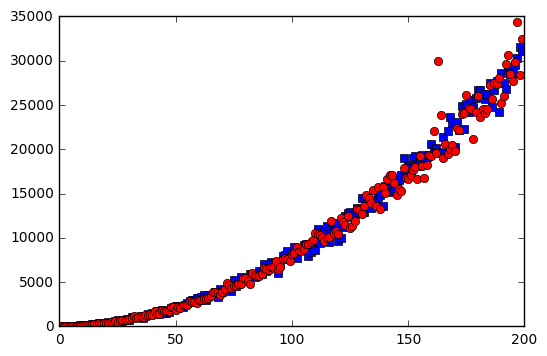

In [86]:
pl.clf()
x = np.arange(200)
y = np.array(exper_analysis(200))
pl.plot(x, y, 'bs')
i = np.array(exper_analysis_time(200))
pl.plot(x, i, 'ro')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [6]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

<h4> Ordenamiento por mezclas</h4>

In [18]:
def merge_sort(l):
    
    if len(l)>1:
        
        mid = len(l)//2 
        lefthalf = l[:mid] 
        righthalf = l[mid:] 

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            
            if lefthalf[i] < righthalf[j]:
                
                l[k]=lefthalf[i] 
                i=i+1 
            else:
                l[k]=righthalf[j] 
                j=j+1 
            k=k+1 

        while i < len(lefthalf):
            
            l[k]=lefthalf[i] 
            i=i+1 
            k=k+1 

        while j < len(righthalf):
            
            l[k]=righthalf[j] 
            j=j+1 
            k=k+1 
    #tomado de http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html
            
def merge_sort_acct(l, acct):

    tic = time.clock()#get start time
    
    if len(l)>1:
        acct.count()
        mid = len(l)//2; acct.count() 
        lefthalf = l[:mid]; acct.count()
        righthalf = l[mid:]; acct.count() 

        merge_sort_acct(lefthalf, acct)
        merge_sort_acct(righthalf, acct)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] < righthalf[j]:
                acct.count()
                l[k]=lefthalf[i]; acct.count() 
                i=i+1; acct.count()
            else:
                l[k]=righthalf[j]; acct.count()
                j=j+1; acct.count()
            k=k+1; acct.count() 

        while i < len(lefthalf):
            acct.count()
            l[k]=lefthalf[i]; acct.count() 
            i=i+1; acct.count() 
            k=k+1; acct.count() 

        while j < len(righthalf):
            acct.count()
            l[k]=righthalf[j]; acct.count() 
            j=j+1; acct.count() 
            k=k+1; acct.count()
        toc = time.clock()#get final time

In [19]:
lista = [20,15,26,365,98,12,1,35,69]
print lista
acct = Counter()
merge_sort_acct(lista, acct)
print lista
acct.print_steps()


[20, 15, 26, 365, 98, 12, 1, 35, 69]
[1, 12, 15, 20, 26, 35, 69, 98, 365]
Number of steps = 157


In [77]:
import random as rnd
import time

def exper_analysis(n):
    results = []
    acct = Counter()
   
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        merge_sort_acct(l, acct)
        results.append(acct.steps)
    return results

def exper_analysis_time(n):
    results = []
    
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get final time
        merge_sort_acct(l, acct)
        toc = time.clock()#get final time
        t = (toc-tic)*3500000
        results.append(t)
    return results

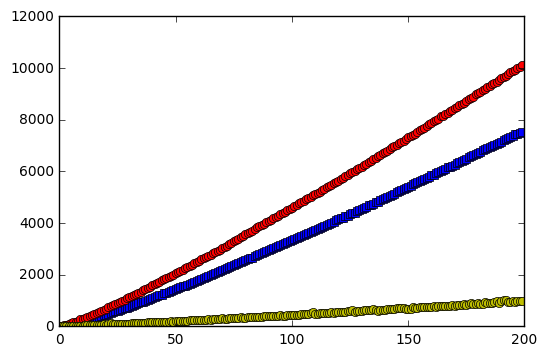

In [74]:
pl.clf()
x = np.arange(200)
y = np.array(exper_analysis(200))
pl.plot(x, y, 'bs')
i = np.array(exper_analysis_time(200))
pl.plot(x, i, 'ro')
i = np.array(exper_analysis_time_q(200))
pl.plot(x, i, 'yo')


<h4> Ordenamiento Quick-Sort</h4>

In [61]:
def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark
#tomado https://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html

In [62]:
l = np.random.permutation(range(0,10))
print(l)
quickSort_acct(l)
print(l)

[3 6 7 0 2 5 9 4 1 8]
[0 1 2 3 4 5 6 7 8 9]


In [75]:
import random as rnd
import time

def exper_analysis_q(n):
    results = []
    acct = Counter()
   
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        merge_sort_acct(l, acct)
        results.append(acct.steps)
    return results

def exper_analysis_time_q(n):
    results = []
    
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get final time
        quickSort(l)
        toc = time.clock()#get final time
        t = (toc-tic)*3500000
        results.append(t)
    return results

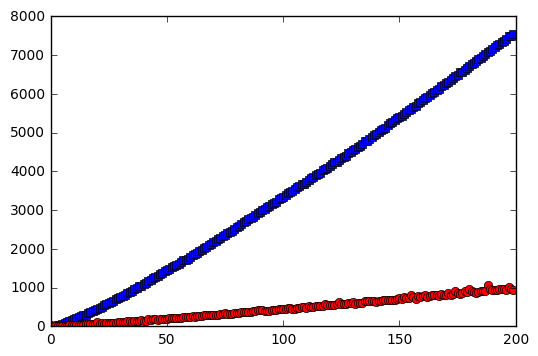

In [81]:
pl.clf()
x = np.arange(200)
y = np.array(exper_analysis_q(200))
pl.plot(x, y, 'bs')
i = np.array(exper_analysis_time_q(200))
pl.plot(x, i, 'ro')
